<a href="https://colab.research.google.com/github/anasimicc/Model-molekuli/blob/main/Model_molekuli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prvi model mašinskog učenja

## 1. Učitavanje podataka

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')


## 2. Priprema podataka

###Podela podataka na x i y

In [ ]:
Y = df['logS']
X = df.drop('logS', axis = 1)

### Podela podataka za treniranje i testiranje

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
y_train

## Pravljenje modela

### Linearna regresija

**Treniranje modela**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)


**Rad modela nad podacima**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

**Evaluacija modela**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Testing_MSE', 'Testing_R2']

### Random forest

**Treniranje modela**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)

**Rad modela nad podacima**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

**Evaluacija modela**

In [ ]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Testing_MSE', 'Testing_R2']

## Poredjenje modela

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis = 0)

In [ ]:
df_models.reset_index(drop = True)

## Prikaz podataka

Text(0.5, 0, 'Real')

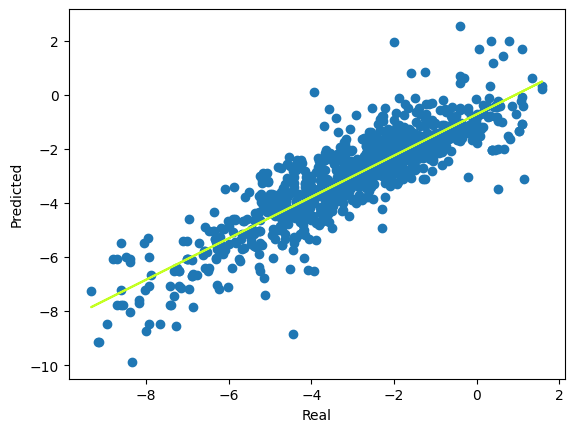

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train, y = y_lr_train_pred)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#C4FF23')
plt.ylabel('Predicted')
plt.xlabel('Real')